# Keras iris Modeling

In [ ]:
import warnings
warnings.filterwarnings('ignore')

* 실습용 데이터 설정
 - iris.csv

In [ ]:
import seaborn as sns

iris = sns.load_dataset('iris')

* pandas DataFrame

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# I. Data Preprocessing

> ## 1) iris.Species 빈도분석

* Species : setosa, virginica, versicolor

In [ ]:
iris.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

> ## 2) DataFrame to Array & Casting

In [ ]:
iris_AR = iris.values

iris_AR

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

* object to float

In [ ]:
AR_X = iris_AR[:, 0:4].astype(float)
AR_y = iris_AR[:, 4]

AR_X.shape, AR_y.shape

((150, 4), (150,))

> ## 3) One Hot Encoding with sklearn & Keras

* LabelEncoder( )
 - ['setosa', 'virginica', 'virsicolor'] to [0, 1, 2]

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()
AR_yLBE = encoder.fit_transform(AR_y)

AR_yLBE

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* One-Hot Encoding - to_categorical( )

In [ ]:
import tensorflow as tf

AR_yOHE = tf.keras.utils.to_categorical(AR_yLBE)

AR_yOHE

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

* tensorFlow Version

In [ ]:
tf.__version__

'2.4.1'

* Keras Version

In [ ]:
tf.keras.__version__

'2.4.0'

> ## 4) Train & Test Split with sklearn Package

* 7 : 3

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(AR_X, AR_yOHE, 
                                                    test_size = 0.3, 
                                                    random_state = 2045) 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105, 3), (45, 3))

# II. Keras Modeling

> ## 1) Keras models & layers Import

In [ ]:
from tensorflow.keras import models 
from tensorflow.keras import layers

> ## 2) Model Define

* 모델 신경망 구조 정의

In [ ]:
Model_iris = models.Sequential()

Model_iris.add(layers.Dense(16, activation = 'relu', input_shape = (4,)))
Model_iris.add(layers.Dense(8, activation = 'relu'))
Model_iris.add(layers.Dense(3, activation = 'softmax'))

* 모델 구조 확인
 - Layers & Parameters

In [ ]:
Model_iris.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


* 모델 레이어 시각화

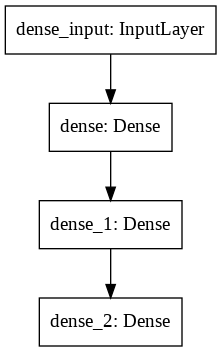

In [ ]:
from tensorflow.keras import utils

utils.plot_model(Model_iris)

> ## 3) Model Compile

* 모델 학습방법 설정

In [ ]:
Model_iris.compile(loss = 'categorical_crossentropy',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

> ## 4) Model Fit

* 모델 학습 수행

In [ ]:
History_iris = Model_iris.fit(X_train, y_train,
                              epochs = 500,
                              batch_size = 7,
                              validation_data = (X_test, y_test))

Epoch 1/500
15/15 [==============================] - 1s 35ms/step - loss: 1.7373 - accuracy: 0.3339 - val_loss: 1.3595 - val_accuracy: 0.3556
Epoch 2/500
15/15 [==============================] - 0s 4ms/step - loss: 1.3604 - accuracy: 0.2420 - val_loss: 1.1619 - val_accuracy: 0.2444
Epoch 3/500
15/15 [==============================] - 0s 4ms/step - loss: 1.1340 - accuracy: 0.2896 - val_loss: 1.0576 - val_accuracy: 0.3333
Epoch 4/500
15/15 [==============================] - 0s 4ms/step - loss: 1.0489 - accuracy: 0.3212 - val_loss: 0.9783 - val_accuracy: 0.4444
Epoch 5/500
15/15 [==============================] - 0s 4ms/step - loss: 0.9703 - accuracy: 0.5154 - val_loss: 0.9332 - val_accuracy: 0.7111
Epoch 6/500
15/15 [==============================] - 0s 4ms/step - loss: 0.9229 - accuracy: 0.7574 - val_loss: 0.8882 - val_accuracy: 0.7778
Epoch 7/500
15/15 [==============================] - 0s 4ms/step - loss: 0.8852 - accuracy: 0.7964 - val_loss: 0.8448 - val_accuracy: 0.7333
Epoch 8/500


> ## 5) 학습 결과 시각화

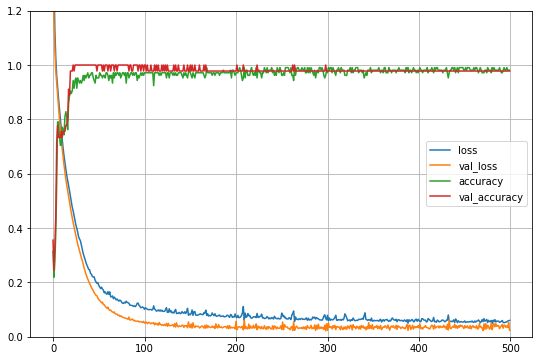

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.ylim(0, 1.2)
plt.plot(History_iris.history['loss'])
plt.plot(History_iris.history['val_loss'])
plt.plot(History_iris.history['accuracy'])
plt.plot(History_iris.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.grid()
plt.show()

> ## 6) Model Evaluate

* Loss & Accuracy

In [ ]:
loss, accuracy = Model_iris.evaluate(X_test, y_test)

print('Loss = {:.2f}'.format(loss))
print('Accuracy = {:.2f}'.format(accuracy))

2/2 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9778
Loss = 0.02
Accuracy = 0.98


> ## 7) Model Predict

* Probability

In [ ]:
import numpy as np
np.set_printoptions(suppress = True, precision = 5)

Model_iris.predict(X_test)

array([[0.99966, 0.00034, 0.     ],
       [0.9987 , 0.0013 , 0.     ],
       [0.00501, 0.99499, 0.     ],
       [0.     , 0.00018, 0.99982],
       [0.99983, 0.00017, 0.     ],
       [0.00069, 0.99931, 0.     ],
       [0.     , 0.00176, 0.99824],
       [0.99997, 0.00003, 0.     ],
       [0.     , 0.00041, 0.99959],
       [0.99968, 0.00032, 0.     ],
       [0.00001, 0.96465, 0.03534],
       [0.     , 0.00099, 0.99901],
       [0.00003, 0.99959, 0.00038],
       [0.99998, 0.00002, 0.     ],
       [0.9998 , 0.0002 , 0.     ],
       [0.00006, 0.99937, 0.00057],
       [0.00001, 0.99557, 0.00442],
       [0.9998 , 0.0002 , 0.     ],
       [0.00003, 0.99992, 0.00005],
       [0.99994, 0.00006, 0.     ],
       [0.99971, 0.00029, 0.     ],
       [0.99973, 0.00027, 0.     ],
       [0.     , 0.00038, 0.99962],
       [0.99982, 0.00018, 0.     ],
       [0.     , 0.01952, 0.98048],
       [0.     , 0.00722, 0.99278],
       [0.99991, 0.00009, 0.     ],
       [0.00001, 0.99919, 0.

* Class

In [ ]:
y_hat = Model_iris.predict_classes(X_test)

y_hat

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

* Probability to Class

In [ ]:
np.argmax(Model_iris.predict(X_test), axis = 1)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

* One-Hot Encoding to Array
 * np.argmax( ) : 다차원 배열의 차원에 따라 가장 큰 값의 인덱스를 반환
 * axis = 1 : 열기준

In [ ]:
y = np.argmax(y_test, axis = 1)

y

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

* Confusion Matrix & Claasification Report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y, y_hat)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 13]])

In [ ]:
print(classification_report(y, y_hat, 
                            target_names = ['setosa',
                                            'virginica',
                                            'versicolor']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
   virginica       0.93      1.00      0.97        14
  versicolor       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# III. Model Save & Load

> ## 1) File System

* Save to Colab File System

In [ ]:
!ls -l

total 12
-rw-r--r-- 1 root root 7979 Mar 18 07:47 model.png
drwxr-xr-x 1 root root 4096 Mar  5 14:37 sample_data


In [ ]:
Model_iris.save('Model_iris.h5')

!ls -l

total 48
-rw-r--r-- 1 root root 34592 Mar 18 07:47 Model_iris.h5
-rw-r--r-- 1 root root  7979 Mar 18 07:47 model.png
drwxr-xr-x 1 root root  4096 Mar  5 14:37 sample_data


* Download Colab File System to Local File System

In [ ]:
from google.colab import files

files.download('Model_iris.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Load from Colab File System

In [ ]:
from keras.models import load_model

Model_local = load_model('Model_iris.h5')

In [ ]:
Model_local.predict_classes(X_test)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

> ## 2) Google Drive

* Mount Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


* Check Mounted_Drive

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets'

total 3043773
-rw------- 1 root root      20066 Mar  4 04:45 cat.1700.jpg
-rw------- 1 root root   69155672 Mar  4 04:46 creditCardFraud.zip
-rw------- 1 root root   90618980 Mar  4 04:51 dogs_and_cats_small.zip
drwx------ 2 root root       4096 Mar  4 05:34 image
-rw------- 1 root root 1245927936 Mar 12 01:01 imagenetV2.zip
-rw------- 1 root root    8204887 Mar  4 04:45 Images_500.zip
-rw------- 1 root root    4240457 Mar 14 09:13 Kaggle_Customer_Satisfaction.zip
-rw------- 1 root root   80596565 May  4  2020 ko_w2v.zip
-rw------- 1 root root   12929865 Mar  4 04:42 Logo_Data.zip
-rw------- 1 root root   18272469 Mar  4 04:50 MNIST.csv
-rw------- 1 root root    7903524 May  4  2020 naverRatings.zip
-rw------- 1 root root   22824989 Mar  7 07:09 Online_Retail.zip
-rw------- 1 root root        741 Mar  4 04:44 PII.csv
-rw------- 1 root root 1141460846 Mar  4 04:50 waferImages.zip
-rw------- 1 root root  414658234 Mar  4 04:49 yolo_weight.zip


In [ ]:
import pandas as pd

DF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/PII.csv')

DF.head(3)

,Name,Gender,Age,Grade,Picture,BloodType,Height,Weight
0,송태섭,남자,21,3,무,B,179.1,63.9
1,최유정,여자,23,1,유,A,177.1,54.9
2,이한나,여자,20,1,무,A,167.9,50.2


* Save to Mounted Google Drive Directory

In [ ]:
Model_iris.save('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 440289
-rw------- 1 root root     34592 Mar 18 07:49 001_Model_iris.h5
-rw------- 1 root root  41498896 Mar  8 07:23 002_dogs_and_cats_small.h5
-rw------- 1 root root  41499744 Mar  8 08:04 003_dogs_and_cats_augmentation.h5
-rw------- 1 root root  25199032 Mar  8 07:43 004_dogs_and_cats_feature_extraction.h5
-rw------- 1 root root 140748400 Mar  9 06:31 005_dogs_and_cats_fine_tuning.h5
-rw------- 1 root root 201873880 Mar  9 07:17 006_dogs_and_cats_VGG16.h5


* Load from Mounted Google Drive Directory

In [ ]:
from keras.models import load_model

Model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

In [ ]:
Model_google.predict_classes(X_test)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

# 
# 
# 
# The End
# 
# 
# 